# Standard Breast Cancer Dataset for linear classification 

In [39]:
# lets import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [40]:
#load the data
data=load_breast_cancer()
type(data)

sklearn.utils.Bunch

## Try to do some EDA

In [41]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [42]:
data.data.shape

(569, 30)

In [43]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [44]:
data.filename

'C:\\Users\\BOND\\anaconda3\\envs\\first_project\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [45]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Lets separate Data for training and testing

In [48]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [49]:
N,D=X_train.shape

In [50]:
# Scaling always plays a big factor in making an unbiased model
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),#This is the input layer with shape equal to no of features
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# lets train

In [52]:
model.compile(
optimizer='adam',
metrics=['accuracy'],
loss='binary_crossentropy'
)
#lets move to fit data
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 45ms/step - loss: 0.5645 - accuracy: 0.7009 - val_loss: 0.5537 - val_accuracy: 0.6784
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4912 - accuracy: 0.7604 - val_loss: 0.5033 - val_accuracy: 0.7719
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4825 - accuracy: 0.7725 - val_loss: 0.4599 - val_accuracy: 0.8187
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4106 - accuracy: 0.8435 - val_loss: 0.4238 - val_accuracy: 0.8421
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3750 - accuracy: 0.8871 - val_loss: 0.3939 - val_accuracy: 0.8596
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3644 - accuracy: 0.8847 - val_loss: 0.3686 - val_accuracy: 0.8772
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3351 - accuracy: 0.8921 - val_loss: 0.3475 - val_accuracy: 0.8889
Epoch 

13/13 [==============================] - 0s 12ms/step - loss: 0.1078 - accuracy: 0.9626 - val_loss: 0.1232 - val_accuracy: 0.9591
Epoch 59/100
13/13 [==============================] - 0s 15ms/step - loss: 0.1167 - accuracy: 0.9533 - val_loss: 0.1220 - val_accuracy: 0.9649
Epoch 60/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0961 - accuracy: 0.9659 - val_loss: 0.1210 - val_accuracy: 0.9649
Epoch 61/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1130 - accuracy: 0.9577 - val_loss: 0.1199 - val_accuracy: 0.9649
Epoch 62/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1183 - accuracy: 0.9551 - val_loss: 0.1188 - val_accuracy: 0.9649
Epoch 63/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1197 - accuracy: 0.9539 - val_loss: 0.1177 - val_accuracy: 0.9649
Epoch 64/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1102 - accuracy: 0.9504 - val_loss: 0.1167 - val_accuracy: 0.9649
Epoch 65/100

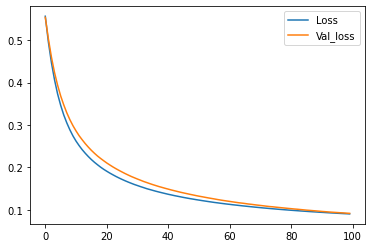

In [53]:
# lets check the performance loss
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label="Val_loss")
plt.legend()

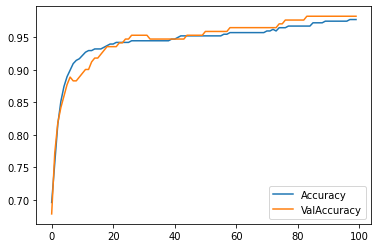

In [54]:
#lets check accuracy
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='ValAccuracy')
plt.legend()

# This was just an introduction to Tensorflow obviously we will not be able to solve every problem so easily but the approach will be almost same for all supervised learning problems